In [1]:
import sys
import os
import numpy as np
import pyccl as ccl
import os
os.environ['CLMM_MODELING_BACKEND'] = 'nc'
import clmm
import clmm.dataops
from clmm.dataops import compute_tangential_and_cross_components, make_radial_profile, make_bins
from clmm.galaxycluster import GalaxyCluster
import clmm.utils as u
from clmm import Cosmology
from clmm.support import mock_data as mock
cosmo = Cosmology(H0 = 71.0, Omega_dm0 = 0.265 - 0.0448, Omega_b0 = 0.0448, Omega_k0 = 0.0)


import numpy as np
import sys
import matplotlib.pyplot as plt
from astropy.cosmology import FlatLambdaCDM
from astropy import units as u
from scipy.integrate import quad,simps, dblquad
from scipy.optimize import curve_fit

In [2]:
import numpy as np
from scipy.integrate import quad, simps
import cluster_toolkit as ct
from cluster_toolkit import deltasigma

In [3]:
clmm.__version__

'0.9.2'

In [4]:
cluster_m = 1e14
cluster_z = 0.5
concentration = 3
moo = clmm.Modeling(massdef = 'critical', delta_mdef = 200, halo_profile_model = 'nfw')
mock_cosmo = Cosmology(H0=70.0, Omega_dm0=0.27-0.045, Omega_b0=0.045, Omega_k0=0.0)
cosmo_ccl = ccl.Cosmology(Omega_c=0.27-0.045, Omega_b=0.045, h=0.7, A_s=2.1e-9, n_s=0.96, Neff=0, Omega_g=0)
cosmo_astropy = FlatLambdaCDM(H0=71.0, Om0=0.265, Ob0 = 0.0448)
moo.set_cosmo(mock_cosmo)
moo.set_mass(cluster_m) 
moo.set_concentration(concentration)
moo_ein = clmm.Modeling(massdef = 'critical', delta_mdef = 200, halo_profile_model = 'einasto')
moo_ein.set_cosmo(mock_cosmo)
moo_ein.set_mass(cluster_m) 
moo_ein.set_concentration(concentration)

In [5]:
sys.path.append('/pbs/throng/lsst/users/cpayerne/GitForThesis/DC2Analysis/modeling')
import Einasto_profile as ein
import NFW_profile as nfw
import Hernquist_profile as hern

In [6]:
cl_200c = nfw.Modeling(cluster_m, concentration, cluster_z, 'critical', cosmo_astropy)

In [7]:
def ds_trunc(R, R_cut):
    ds = []
    for r in R:
        if r < R_cut : ds.append(moo.eval_excess_surface_density(r, cluster_z))
        else: ds.append(cl_200c.M(R_cut)/(np.pi*r**2))
    return np.array(ds)

In [8]:
R = np.logspace(-1,3,100)
R_cut = np.linspace(1,6,5)

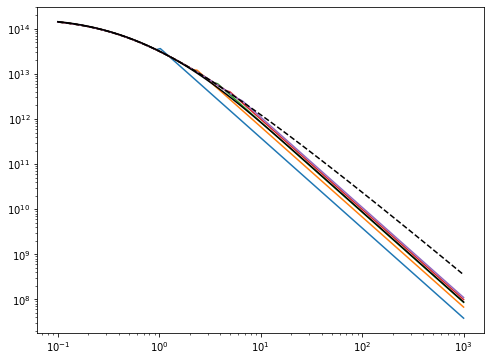

In [9]:
plt.figure(figsize = (8,6))
for R_cut_ in R_cut:
    plt.loglog(R, ds_trunc(R, R_cut_))
plt.loglog(R, moo.eval_excess_surface_density(R, cluster_z), '--k')
plt.loglog(R, moo_ein.eval_excess_surface_density(R, cluster_z), '-k')